Given the volatility of cryptocurrencies, this research seeks to understand if swing trade XRP* will be possible by observing trends of long term as well as short term trade prices of XRP. Then use these characteristics to predict when to buy and sell XRP using classification techniques. (Since the end results are specific actions such as "Buy", Classification techniques will be used rather than Regression)

The data of XRP trade history (of 5-minute intervals) will be taken from the exchange:
https://poloniex.com


* what is XRP: https://en.wikipedia.org/wiki/Ripple_(payment_protocol)

## Import things 

In [2]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.environ["PATH"] += os.pathsep + 'D:/LatexPackage/miktex/bin/x64'

In [3]:
import warnings
warnings.filterwarnings("ignore")


In [4]:
import numpy as np

import matplotlib.pyplot as plt

import datetime as dt

from datetime import datetime

import numpy as np

import pandas as pd
import urllib.request
     

from IPython.display import clear_output

## Initialisation Set up

In [10]:
# valid period : 300, 900, 1800, 7200, 14400, 86400 :seconds
 
def GetCurDF_5min(cur,start):
    '''
    cur:    3 letter abbreviation for cryptocurrency (BTC, LTC, etc)
    fp:     File path (to save price data to CSV)
    '''
    start = start 
    end = start + 7776000 #90 days is safe
    print("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=300".format(cur, start,end))
    openUrl = urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=300'".format(cur, start,end))
    r = openUrl.read()
    openUrl.close()
    df = pd.read_json(r.decode())
    df['date'] = df['date'].astype(np.int64) // 1000000000   ## datetime.fromtimestamp(1424138400) to convert back
    return df

## Initialisation

adjusted for only XRP 5 minute responses, other timing and crypto can also be selected

In [11]:
# for coin in ['LSK','ETH','ETC','STR','XMR','XRP','LTC','ATOM','XMR','ZEC','BAT','SNT','BTC']:
    
for coin in ['XRP']:
    clear_output()

    starting_time_all = 1420070400
    
    list_5min = []
    list_30min = []
    list_2H = []

    while starting_time_all < datetime.timestamp(datetime.now()):
        
        timestamp_start = str(datetime.fromtimestamp(starting_time_all)).replace(':','').replace('-','').replace(' ','')

        df_5min  =  [GetCurDF_5min(coin,starting_time_all), '{0}_5min_Freq_starting_at_{1}'.format(coin,timestamp_start)]
        
        for tables in [df_5min]:
            if '_5min_' in tables[1]:
                tables[0].to_csv('Coin_Data_5min/{0}.csv'.format(tables[1]))
                list_5min.append(tables[1])

        starting_time_all += 7776000
        
        
        print(coin, starting_time_all)
        
        
        
    to_save_list = [list_5min]
        
        
    for li in to_save_list:

        MyFile=open('{0}_5min_Freq.txt'.format(coin),'w')

        for element in li:
            MyFile.write(element)
            MyFile.write('\n')
        MyFile.close()
        

https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1420070400&end=1427846400&period=300
XRP 1427846400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1427846400&end=1435622400&period=300
XRP 1435622400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1435622400&end=1443398400&period=300
XRP 1443398400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1443398400&end=1451174400&period=300
XRP 1451174400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1451174400&end=1458950400&period=300
XRP 1458950400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1458950400&end=1466726400&period=300
XRP 1466726400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1466726400&end=1474502400&period=300
XRP 1474502400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&st

## Updating existing data if needed

In [13]:
for coin in ['XRP']:
    clear_output()

    starting_time_all = 1564702500 # starting on aug 2nd 2019 due to refresh data
    
    list_5min = []
    list_30min = []
    list_2H = []

    while starting_time_all < datetime.timestamp(datetime.now()):
        
        timestamp_start = str(datetime.fromtimestamp(starting_time_all)).replace(':','').replace('-','').replace(' ','')

        df_5min  =  [GetCurDF_5min(coin,starting_time_all), '{0}_5min_Freq_starting_at_{1}'.format(coin,timestamp_start)]
        
#         df_30min =  [GetCurDF_30min(coin,starting_time_all), '{0}_30min_Freq_starting_at_{1}'.format(coin,timestamp_start)]
        
#         df_2Hour =  [GetCurDF_2Hours(coin,starting_time_all), '{0}_2H_Freq_starting_at_{1}'.format(coin,timestamp_start)]

        
        for tables in [df_5min]:#, df_30min , df_2Hour]:
            if '_5min_' in tables[1]:
                tables[0].to_csv('./Coin_Data_5min/{0}.csv'.format(tables[1]))
                list_5min.append(tables[1])
                
#             elif '_30min_' in tables[1]:
#                 tables[0].to_csv('Coin_Data_30min/{0}.csv'.format(tables[1]))
#                 list_30min.append(tables[1])
#             else:
#                 tables[0].to_csv('Coin_Data_2H/{0}.csv'.format(tables[1]))
#                 list_2H.append(tables[1])
                
        starting_time_all += 7776000
        
        
        print(coin, starting_time_all)
        
        
        
    to_save_list = [list_5min]#, list_30min, list_2H]
        
        
    for li in to_save_list:

        if '_5min_' in li[0]:
            
            list_5min = []
            
            read_MyFile=open('{0}_5min_Freq.txt'.format(coin),'r')
            
            for i in read_MyFile:
                list_5min.append(int(i.split('_')[-1]))
                
            read_MyFile.close()
            
            MyFile=open('{0}_5min_Freq.txt'.format(coin),'a')

#         elif '_30min_' in li[0]:
#             MyFile=open('{0}_30min_Freq.txt'.format(coin),'w')

#         else:
#             MyFile=open('{0}_2H_Freq.txt'.format(coin),'w')

            for element in li:
                if int(element.split('_')[-1]) not in list_5min:
                    MyFile.write(element)
                    MyFile.write('\n')
            MyFile.close()


NameError: name 'GetCurDF_5min' is not defined

# Starting of analysis

### Get 5min XRP data

In [14]:
XRP = []
for myf in open('./XRP_5min_Freq.txt'):
    XRP.append(myf.replace('\n',''))

In [15]:
XRP_Data = []
for E in XRP:
    XRP_Temp = pd.read_csv('./Coin_Data_5min/{0}.csv'.format(E))
    XRP_Data.append(XRP_Temp)

In [16]:
XRP_Data = pd.concat(XRP_Data)

In [17]:
XRP_Data = XRP_Data.drop(columns = ['Unnamed: 0']).drop_duplicates()

In [18]:
XRP_Data['datetime_real'] = XRP_Data['date'].apply(lambda x: datetime.fromtimestamp(x))

#### rough check on data

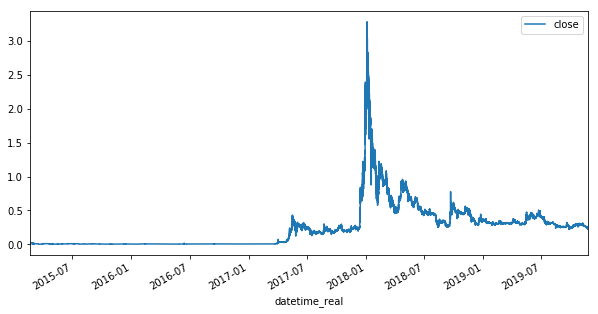

In [19]:
XRP_Data.set_index('datetime_real')[['close']].plot(figsize = (10,5))

In [20]:
XRP_Data.tail(10)

,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real
22457,0.234104,1574551500,0.234104,0.234104,0.234104,404.882540,94.784715,0.234104,2019-11-23 23:25:00
22458,0.234104,1574551800,0.234104,0.234104,0.234104,0.000000,0.000000,0.234104,2019-11-23 23:30:00
22459,0.234104,1574552100,0.234104,0.234104,0.234104,0.000000,0.000000,0.234104,2019-11-23 23:35:00
22460,0.234104,1574552400,0.234104,0.234104,0.234104,0.000000,0.000000,0.234104,2019-11-23 23:40:00
22461,0.234104,1574552700,0.234104,0.234104,0.234104,0.000000,0.000000,0.234104,2019-11-23 23:45:00
22462,0.233862,1574553000,0.233862,0.233862,0.233862,12038.620000,2815.375109,0.233862,2019-11-23 23:50:00
6916,0.233862,1574553300,0.233862,0.233862,0.233862,0.000000,0.000000,0.233862,2019-11-23 23:55:00
6917,0.234757,1574553600,0.234757,0.234353,0.234353,9131.855007,2140.819885,0.234434,2019-11-24 00:00:00
6918,0.233364,1574553900,0.234395,0.233126,0.233637,11273.953602,2630.939680,0.233364,2019-11-24 00:05:00
6919,0.232727,1574554200,0.232727,0.232727,0.232727,5.000000,1.163636,0.232727,2019-11-24 00:10:00



 selecting '2018-08-15 00:00:00' as the starting time as it bypasses the past crypto rush


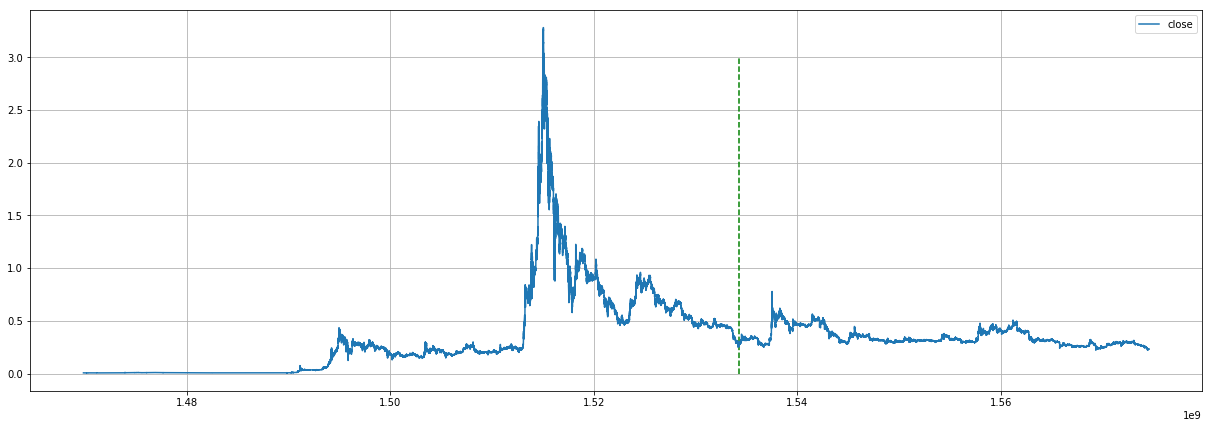

In [21]:
ploting_breakdown = XRP_Data[150000:]

plt.figure(figsize= (21,7))


# tran_y_low = ploting_breakdown['low']
# tran_y_high = ploting_breakdown['high']
tran_y_close = ploting_breakdown['close']

tran_x = ploting_breakdown['date']


# plt.plot(tran_x, tran_y_low, alpha = 0.1)
# plt.plot(tran_x, tran_y_high , alpha  = 0.1)

plt.plot(tran_x, tran_y_close, alpha  = 1)


# start = 45000
# dealta_t = 10000
time_section = {45000 : 13000,
                63000 : 8000 ,
                71000 : 10000,
                180000: 10000}  # start // delta_t



plt.vlines(1534287600, 0, 3, alpha = 1, color = 'g',linestyle = 'dashed')
    
plt.legend()
plt.grid()
print("\n selecting '2018-08-15 00:00:00' as the starting time as it bypasses the past crypto rush")

In [22]:
ploting_breakdown[ploting_breakdown['datetime_real'] == '2018-08-15 00:00:00']

,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real
17844,0.26425,1534287600,0.26425,0.26425,0.26425,0.0,0.0,0.26425,2018-08-15


In [23]:
ploting_breakdown[ploting_breakdown['datetime_real'] == '2019-08-15 00:00:00']

,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real
19284,0.269059,1565823600,0.269059,0.269059,0.269059,0.0,0.0,0.269059,2019-08-15


In [24]:
XRP_Data_backUp = XRP_Data.copy()

## Copy for testing

In [25]:
XRP_for_training =XRP_Data[(XRP_Data['date'] >= 1534287600) &
                           (XRP_Data['date'] <1565823600)].copy()

In [26]:
XRP_for_testing =XRP_Data[(XRP_Data['date'] >= 1565823600)].copy()

## Analysis on training datasets

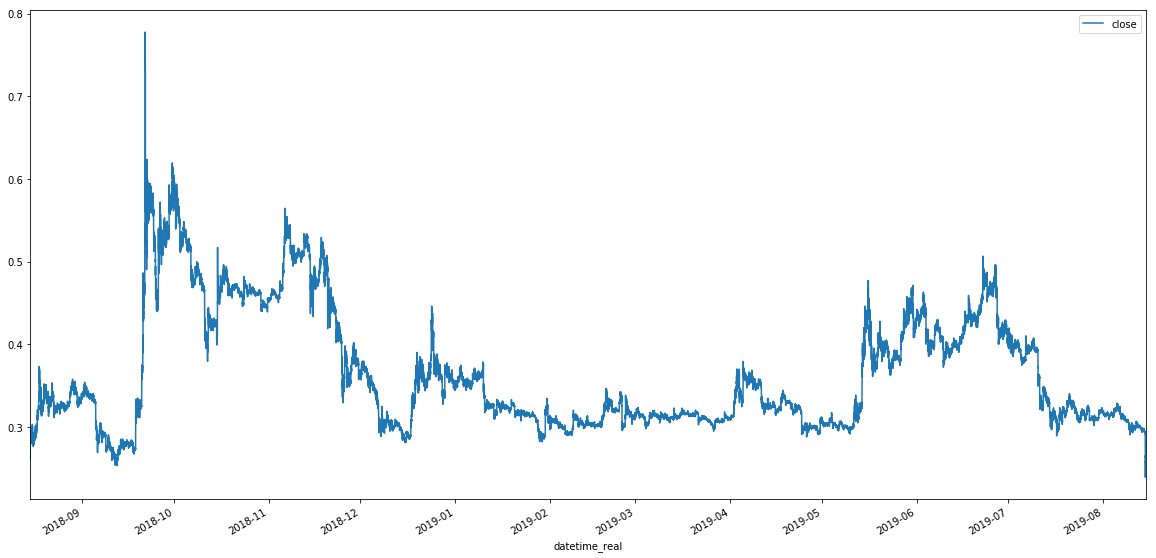

In [27]:
XRP_for_training.set_index('datetime_real')[['close']].plot(figsize = (20,10))

## Data mining, making own properties and features

In [28]:
section_period = {  '5min': 1,
                    '10min': 2,
                    '15min': 3,
                    '20min': 4,
                    '1H': 12,
                    '2H': 24,
                    '4H': 48,
                    '12H': 144,
                    '24H': 288,
                    '5D': 1440,
                    '10D': 2880}

In [29]:
for k,v in section_period.items():
    XRP_for_training['{0}_RA_on_Close'.format(k)] = XRP_for_training['close'].rolling(v).mean()

In [30]:
compare_sequence = {}

In [31]:
for col_1 in [d for d in XRP_for_training.columns if '_RA_on_Close' in d]:
    for col_2 in [d for d in XRP_for_training.columns if '_RA_on_Close' in d]:
        temp_1 = col_1.split('_RA_on_Close')[0]
        temp_2 = col_2.split('_RA_on_Close')[0]
        if temp_1 != temp_2:
            if ((temp_1 + '_minus_' + temp_2) not in compare_sequence.keys() and (temp_2 + '_minus_' + temp_1) not in compare_sequence.keys() ):
                compare_sequence.update({temp_1 + '_minus_' + temp_2 : [col_1, col_2]})

In [32]:
for k, val in compare_sequence.items():
    XRP_for_training[k] = (XRP_for_training[val[0]] - XRP_for_training[val[1]])/XRP_for_training[val[1]] 
#     print(k, val[0], val[1])

In [33]:
for col in [d for d in XRP_for_training.columns if '_RA_on_Close' in d]:
    XRP_for_training[col] = XRP_for_training[col].shift(1)
    
    XRP_for_training['{0}_close_percent_dif'.format(col.split('_RA_on_Close')[0])] = (XRP_for_training['close']-XRP_for_training[col])/XRP_for_training[col] 

In [34]:
for k,v in section_period.items():
    print(k,v)
    XRP_for_training['look_back_{}'.format(k)] = XRP_for_training['close'].shift(v)   # i.e. 20min ago, this is what the close price is
    XRP_for_training['look_forward_{}'.format(k)] = XRP_for_training['close'].shift(-v)  # i.e. 20min later, the close price is


for k,v in section_period.items():
    print(k,v)
    XRP_for_training['calculate_look_back_Percent_{}'.format(k)]    = 100*(XRP_for_training['close'] - XRP_for_training['look_back_{}'.format(k)])/(5*v)
    XRP_for_training['calculate_look_forward_Percent_{}'.format(k)] =  100*(XRP_for_training['look_forward_{}'.format(k)] - XRP_for_training['close'])/(5*v)

5min 1
10min 2
15min 3
20min 4
1H 12
2H 24
4H 48
12H 144
24H 288
5D 1440
10D 2880
5min 1
10min 2
15min 3
20min 4
1H 12
2H 24
4H 48
12H 144
24H 288
5D 1440
10D 2880


net_{net_percent}_percent is the net_percent + minimum for profit, 

i.e. net_01_percent = 0.1% + 0.003 = 0.004

In [35]:
net_01_percent = 0.004
net_02_percent = 0.005

In [36]:
Buy_in_decision = pd.DataFrame((XRP_for_training[['date'] + [d for d in XRP_for_training.columns if '_forward_Percent_' in d]].set_index('date') > 0.005).any(axis =1 )).rename(columns ={0: 'Buy_In'})

In [37]:
within_target_02_profit = XRP_for_training.merge(Buy_in_decision.reset_index(), on ='date', how='left').dropna()

#### Selecting properties and becareful not to have any properties that look forward

In [38]:
properties = [
#     'close',
#  'date',
#  'high',
#  'low',
#  'open',
 'quoteVolume',
 'volume',
#  'weightedAverage',
#  'datetime_real',
 '5min_close_percent_dif',
 '10min_close_percent_dif',
 '15min_close_percent_dif',
 '20min_close_percent_dif',
 '1H_close_percent_dif',
 '2H_close_percent_dif',
 '4H_close_percent_dif',
 '12H_close_percent_dif',
 '24H_close_percent_dif',
 '5D_close_percent_dif',
 '10D_close_percent_dif',
 'calculate_look_back_Percent_5min',
 'calculate_look_back_Percent_10min',
 'calculate_look_back_Percent_15min',
 'calculate_look_back_Percent_20min',
 'calculate_look_back_Percent_1H',
 'calculate_look_back_Percent_2H',
 'calculate_look_back_Percent_4H',
 'calculate_look_back_Percent_12H',
 'calculate_look_back_Percent_24H',
 'calculate_look_back_Percent_5D',
 'calculate_look_back_Percent_10D',
 '5min_minus_10min',
 '5min_minus_15min',
 '5min_minus_20min',
 '5min_minus_1H',
 '5min_minus_2H',
 '5min_minus_4H',
 '5min_minus_12H',
 '5min_minus_24H',
 '5min_minus_5D',
 '5min_minus_10D',
 '10min_minus_15min',
 '10min_minus_20min',
 '10min_minus_1H',
 '10min_minus_2H',
 '10min_minus_4H',
 '10min_minus_12H',
 '10min_minus_24H',
 '10min_minus_5D',
 '10min_minus_10D',
 '15min_minus_20min',
 '15min_minus_1H',
 '15min_minus_2H',
 '15min_minus_4H',
 '15min_minus_12H',
 '15min_minus_24H',
 '15min_minus_5D',
 '15min_minus_10D',
 '20min_minus_1H',
 '20min_minus_2H',
 '20min_minus_4H',
 '20min_minus_12H',
 '20min_minus_24H',
 '20min_minus_5D',
 '20min_minus_10D',
 '1H_minus_2H',
 '1H_minus_4H',
 '1H_minus_12H',
 '1H_minus_24H',
 '1H_minus_5D',
 '1H_minus_10D',
 '2H_minus_4H',
 '2H_minus_12H',
 '2H_minus_24H',
 '2H_minus_5D',
 '2H_minus_10D',
 '4H_minus_12H',
 '4H_minus_24H',
 '4H_minus_5D',
 '4H_minus_10D',
 '12H_minus_24H',
 '12H_minus_5D',
 '12H_minus_10D',
 '24H_minus_5D',
 '24H_minus_10D',
 '5D_minus_10D']

## split into target and properties

In [39]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [40]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import os

import pydot

In [41]:
from collections import Counter

In [42]:
import math

In [43]:
target_y = within_target_02_profit[['Buy_In']].copy()

In [44]:
train_x = within_target_02_profit[properties].copy()

In [45]:
train_x.columns

Index(['quoteVolume', 'volume', '5min_close_percent_dif',
       '10min_close_percent_dif', '15min_close_percent_dif',
       '20min_close_percent_dif', '1H_close_percent_dif',
       '2H_close_percent_dif', '4H_close_percent_dif', '12H_close_percent_dif',
       '24H_close_percent_dif', '5D_close_percent_dif',
       '10D_close_percent_dif', 'calculate_look_back_Percent_5min',
       'calculate_look_back_Percent_10min',
       'calculate_look_back_Percent_15min',
       'calculate_look_back_Percent_20min', 'calculate_look_back_Percent_1H',
       'calculate_look_back_Percent_2H', 'calculate_look_back_Percent_4H',
       'calculate_look_back_Percent_12H', 'calculate_look_back_Percent_24H',
       'calculate_look_back_Percent_5D', 'calculate_look_back_Percent_10D',
       '5min_minus_10min', '5min_minus_15min', '5min_minus_20min',
       '5min_minus_1H', '5min_minus_2H', '5min_minus_4H', '5min_minus_12H',
       '5min_minus_24H', '5min_minus_5D', '5min_minus_10D',
       '10min_minus_15

In [46]:
target_y.columns

Index(['Buy_In'], dtype='object')

In [47]:
# X_train, X_test, y_train, y_test = train_test_split(train_x, target_y, test_size=0.33, random_state=324)

In [48]:
X_train_order = train_x.iloc[:-math.floor(len(train_x)*0.2)]

In [49]:
y_train_order = target_y.iloc[:-math.floor(len(target_y)*0.2)]

In [50]:
X_test_order = train_x.iloc[-math.floor(len(train_x)*0.2):]

In [51]:
y_test_order = target_y.iloc[-math.floor(len(target_y)*0.2):]

In [52]:
buy_in_decision_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
buy_in_decision_classifier.fit(X_train_order, y_train_order)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [53]:
predictions = buy_in_decision_classifier.predict(X_test_order)

In [54]:
accuracy_score(y_true = y_test_order, y_pred = predictions)

0.6008756479291429

In [55]:
for node in [2,3,4,5,6,8,10,12]:
    buy_in_decision_classifier = DecisionTreeClassifier(max_leaf_nodes=node, random_state=0)
    buy_in_decision_classifier.fit(X_train_order, y_train_order)

    predictions = buy_in_decision_classifier.predict(X_test_order)

    print(accuracy_score(y_true = y_test_order, y_pred = predictions)) 

0.5520104675154748
0.6108902420612954
0.6190428262291782
0.6008756479291429
0.6008756479291429
0.6008756479291429
0.6008756479291429
0.6008756479291429


In [56]:
Counter(predictions)

Counter({True: 11572, False: 8299})

In [57]:
Counter(y_test_order['Buy_In'])

Counter({True: 9981, False: 9890})

In [58]:
predictions

array([ True,  True,  True, ...,  True,  True,  True])

In [59]:
dot_data = StringIO()
export_graphviz(buy_in_decision_classifier,
                feature_names=list(X_train_order.columns),
                out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

In [60]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

In [61]:
graph.write_png("tree.png")


True

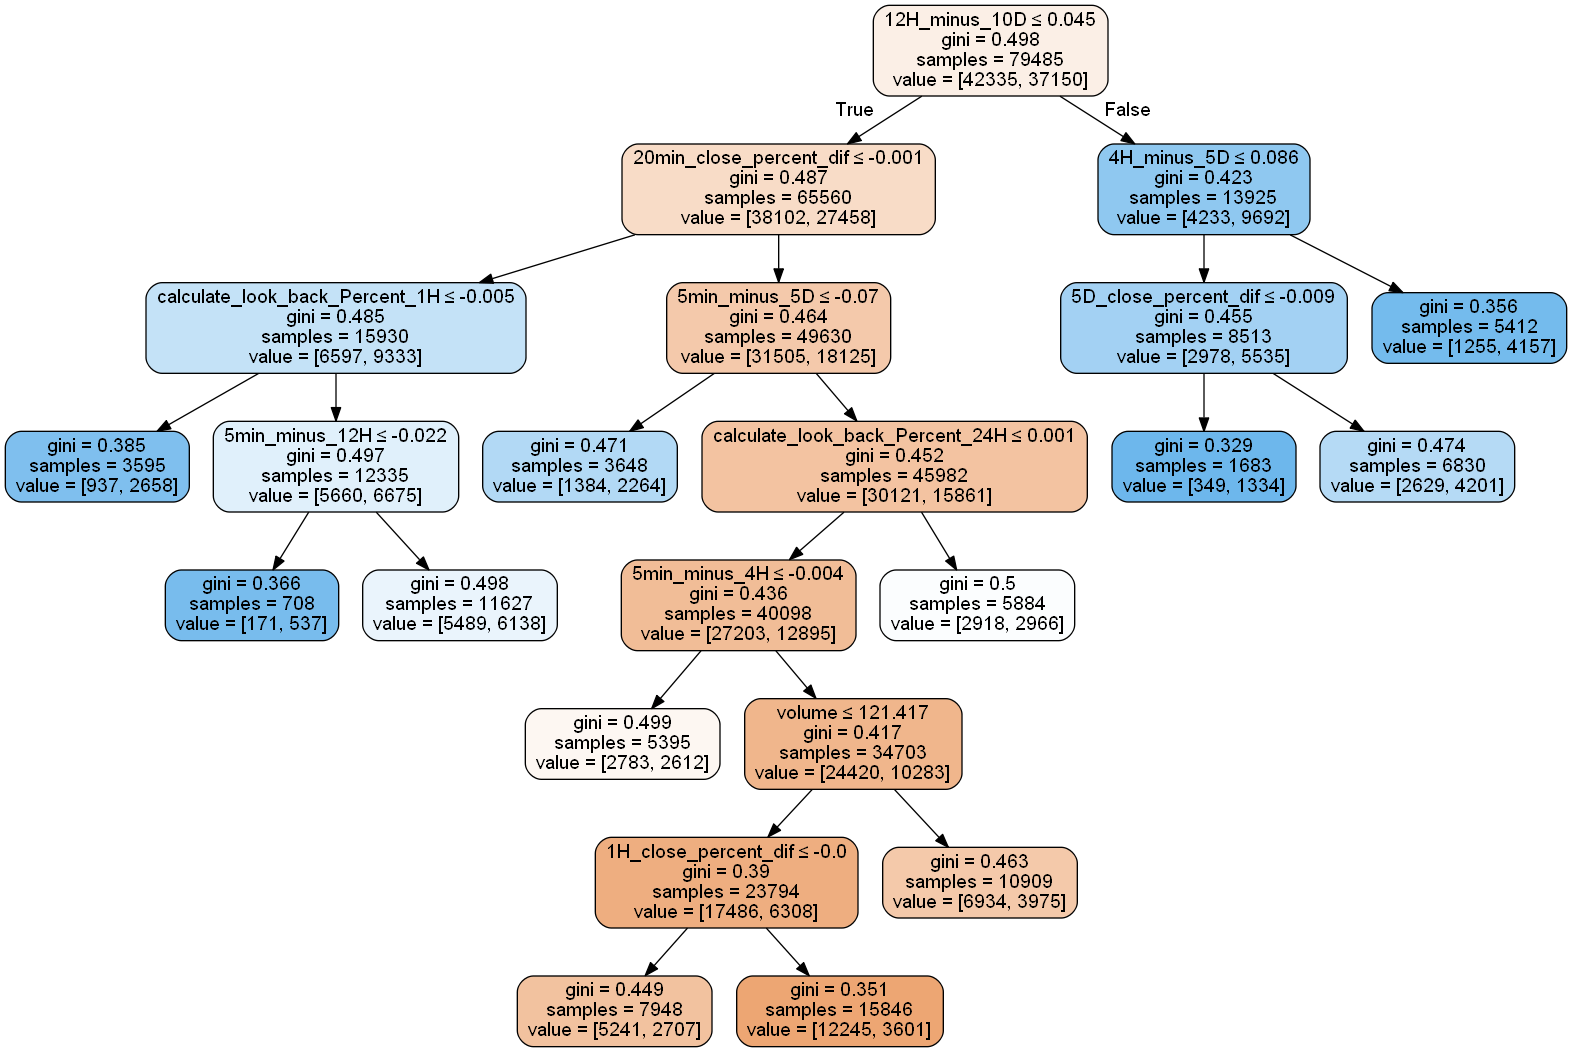

In [62]:
Image(graph.create_png())

## Testing theory

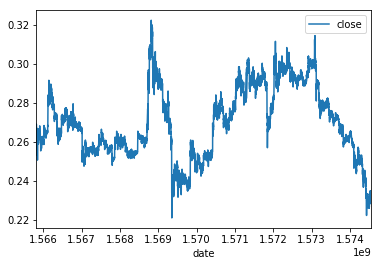

In [63]:
XRP_for_testing[['close','date']].set_index('date').plot()

In [64]:
section_period = {  '5min': 1,
                    '10min': 2,
                    '15min': 3,
                    '20min': 4,
                    '1H': 12,
                    '2H': 24,
                    '4H': 48,
                    '12H': 144,
                    '24H': 288,
                    '5D': 1440,
                    '10D': 2880}


In [65]:
for k,v in section_period.items():
    XRP_for_testing['{0}_RA_on_Close'.format(k)] = XRP_for_testing['close'].rolling(v).mean()

In [66]:
compare_sequence = {}

In [67]:
for col_1 in [d for d in XRP_for_testing.columns if '_RA_on_Close' in d]:
    for col_2 in [d for d in XRP_for_testing.columns if '_RA_on_Close' in d]:
        temp_1 = col_1.split('_RA_on_Close')[0]
        temp_2 = col_2.split('_RA_on_Close')[0]
        if temp_1 != temp_2:
            if ((temp_1 + '_minus_' + temp_2) not in compare_sequence.keys() and (temp_2 + '_minus_' + temp_1) not in compare_sequence.keys() ):
                compare_sequence.update({temp_1 + '_minus_' + temp_2 : [col_1, col_2]})

In [68]:
for k, val in compare_sequence.items():
    XRP_for_testing[k] = (XRP_for_testing[val[0]] - XRP_for_testing[val[1]])/XRP_for_testing[val[1]] 
#     print(k, val[0], val[1])

In [69]:
for col in [d for d in XRP_for_testing.columns if '_RA_on_Close' in d]:
    XRP_for_testing[col] = XRP_for_testing[col].shift(1)
    
    XRP_for_testing['{0}_close_percent_dif'.format(col.split('_RA_on_Close')[0])] = (XRP_for_testing['close']-XRP_for_testing[col])/XRP_for_testing[col] 

In [70]:
for k,v in section_period.items():
    print(k,v)
    XRP_for_testing['look_back_{}'.format(k)] = XRP_for_testing['close'].shift(v)   # i.e. 20min ago, this is what the close price is
#     XRP_for_testing['look_forward_{}'.format(k)] = XRP_for_testing['close'].shift(-v)  # i.e. 20min later, the close price is


for k,v in section_period.items():
    print(k,v)
    XRP_for_testing['calculate_look_back_Percent_{}'.format(k)]    = 100*(XRP_for_testing['close'] - XRP_for_testing['look_back_{}'.format(k)])/(5*v)
#     XRP_for_testing['calculate_look_forward_Percent_{}'.format(k)] =  100*(XRP_for_testing['look_forward_{}'.format(k)] - XRP_for_testing['close'])/(5*v)

5min 1
10min 2
15min 3
20min 4
1H 12
2H 24
4H 48
12H 144
24H 288
5D 1440
10D 2880
5min 1
10min 2
15min 3
20min 4
1H 12
2H 24
4H 48
12H 144
24H 288
5D 1440
10D 2880


In [71]:
Counter(buy_in_decision_classifier.predict(XRP_for_testing[properties].dropna()))

Counter({False: 16505, True: 9718})

In [72]:
XRP_for_testing_drop_na = XRP_for_testing.dropna()

In [73]:
XRP_for_testing_drop_na['Buy_from_decision_tree'] = buy_in_decision_classifier.predict(XRP_for_testing[properties].dropna())

In [91]:
time_event = {}
starting_asset = 100
bought_crypto = False
over_write = False

gold_available = starting_asset 
XRP_amount = 0

stop_loss_limit = -0.02

overwrite_sell = 0.03
wait_15min_sell_activate = False

In [92]:
for ind, df in XRP_for_testing_drop_na[2:].iterrows():
    print(df['date'])


    overwrite_track_price_10min_ago = XRP_for_testing_drop_na[XRP_for_testing_drop_na['date'] == (df['date'] - 600)]['date'].values[0]
    overwrite_track_time_10min_ago = XRP_for_testing_drop_na[XRP_for_testing_drop_na['date'] == (df['date'] - 600)]['close'].values[0]

    if bought_crypto != True: # then looking to buy at drop limit or lower
        if (overwrite_track_time_10min_ago - df['close'])/overwrite_track_time_10min_ago > 0.1:
            print("manual overwrite 10% sharp drop")
            
            XRP_amount += (gold_available/df['low']) * 0.998 # due to 0.2% fee

            gold_available -= gold_available

            time_event.update({df['date']  : ( gold_available, XRP_amount , 'brought' , df['low'])})

            last_xrp_traction_price =  df['low']

            bought_crypto = True
            over_write = True
            
            over_write_time = df['date']
            
            latest_bought_crypto_timestamp = df['date']
            
            print(over_write_time, over_write )
            
            
        
        
        elif df['Buy_from_decision_tree'] and over_write == False: 
            "then buy crypto"

            XRP_amount += (gold_available/df['low']) * 0.998 # due to 0.2% fee

            gold_available -= gold_available

            time_event.update({df['date']  : ( gold_available, XRP_amount , 'brought' , df['low'])})

            last_xrp_traction_price =  df['low']

            bought_crypto = True

            latest_bought_crypto_timestamp = df['date']
            #print('last_xrp_traction_price ', last_xrp_traction_price)

    else:
        if (overwrite_track_time_10min_ago - df['close'])/overwrite_track_time_10min_ago > 0.1: #overwrite sell
            wait_15min_sell_activate = True
            over_write_price = df['close']
            print("overwrite")
            
        if wait_15min_sell_activate == False:
            
            if bought_crypto and over_write == False: # has crypto, either wait or sell at stoploss or profit

#                 if (df['close'] - last_xrp_traction_price ) / last_xrp_traction_price <= stop_loss_limit: # then hit stop loss, force sell

#                     #print('stoppppppppppppppppppppppppp')
#                     gold_available += XRP_amount * df['low'] * 0.998  # sell at low price

#                     XRP_amount -= XRP_amount

#                     time_event.update({df['date']  : ( gold_available, XRP_amount , 'stop_loss_hit' ,  df['low'])})

#                     bought_crypto = False


                if df['date'] - latest_bought_crypto_timestamp > 172800 * 5:

                    gold_available += XRP_amount * df['low'] * 0.998  # sell at low price

                    XRP_amount -= XRP_amount

                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'time_stop' ,  df['low'])})

                    bought_crypto = False


                elif (df['high'] - last_xrp_traction_price)/df['high'] >= 0.005:

                    gold_available += XRP_amount * df['high'] * 0.998  # sell at low price

                    XRP_amount -= XRP_amount

                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'sell' ,  df['low'])})

                    bought_crypto = False


            elif bought_crypto and over_write:
                if (df['high'] - last_xrp_traction_price)/df['high'] >= overwrite_sell:

                    gold_available += XRP_amount * df['high'] * 0.998  # sell at low price
                    XRP_amount -= XRP_amount

                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'sell_overwrite' ,  df['high'])})

                    bought_crypto = False
                    over_write = False


                elif df['date'] - over_write_time >= 900: # 15minute overwrite times

                    gold_available += XRP_amount * df['low'] * 0.998  # sell at low price
                    XRP_amount -= XRP_amount

                    time_event.update({df['low']  : ( gold_available, XRP_amount , 'time_overwrite_pass' ,  df['low'])})

                    bought_crypto = False
                    over_write = False

                
                    
        else: #overwrite stop loss
            print('activate overwrite stop loss')
            if (df['high'] - over_write_price)/df['high'] >= overwrite_sell:
                
                gold_available += XRP_amount * df['high'] * 0.998  # sell at low price
                XRP_amount -= XRP_amount

                time_event.update({df['date']  : ( gold_available, XRP_amount , 'sell_overwrite_stop_loss' ,  df['high'])})

                bought_crypto = False
                over_write = False
                wait_15min_sell_activate = False
                
            
            elif df['date'] - over_write_time >= 900: # 15minute overwrite times

                gold_available += XRP_amount * df['low'] * 0.998  # sell at low price
                XRP_amount -= XRP_amount

                time_event.update({df['low']  : ( gold_available, XRP_amount , 'time_overwrite_pass_stop_losee' ,  df['low'])})

                bought_crypto = False
                over_write = False
                wait_15min_sell_activate = False
                
    clear_output()

In [93]:
transation_log = pd.DataFrame.from_dict(time_event, orient='index', columns= ['Gold', 'XRP_Amount', 'action', 'price_action_happened'])

transation_log['datetime_real'] = [datetime.fromtimestamp(d) for d in transation_log.index]

transation_log['USD'] = round(transation_log['Gold'], 2)

transation_log['XRP_Amount'] = round(transation_log['XRP_Amount'], 4)

In [94]:
transation_log[(transation_log['action'] != 'brought') & (transation_log['action'] != 'sell')]

,Gold,XRP_Amount,action,price_action_happened,datetime_real,USD
1567644600,95.788266,0.0,time_stop,0.257700,2019-09-05 01:50:00,95.79
1569351600,103.528687,0.0,sell_overwrite_stop_loss,0.234299,2019-09-24 20:00:00,103.53
1573951800,197.721775,0.0,time_stop,0.261824,2019-11-17 00:50:00,197.72


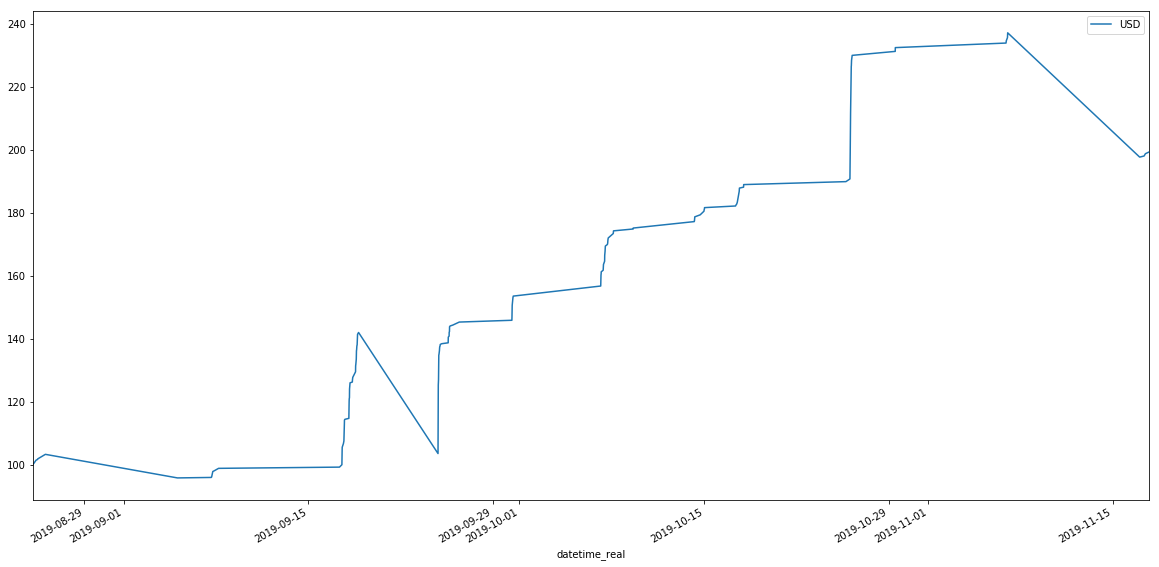

In [95]:
transation_log[transation_log['action'] != 'brought'].set_index('datetime_real')[['USD']].plot(figsize = (20,10))

## Final result visualisation

In [71]:
def plotting_view(xrp_data_input , trading_log ):

#     ploting_breakdown = XRP_Analysis_table[(XRP_Analysis_table['date'] >= 1507374600 ) &
#                                            (XRP_Analysis_table['date'] <= 1511274300 )]


    transaction_display = trading_log
    transaction_display['time_start'] = transaction_display.index
    transaction_display['time_end'] = round(transaction_display['time_start'].shift(-1), 0)

    transaction_display['action_to_color'] = transaction_display['action'].shift(-1)

    transaction_display['colour_section'] = transaction_display['action_to_color'].apply(lambda x: 'black' if x == 'stop_loss_hit' else 'blue' if x == 'time_stop' else 'g')
#     transaction_display['colour_section'] = transaction_display['action_to_color'].apply(lambda x: 'o' if x == 'time_stop' else x)
    
    ploting_breakdown = xrp_data_input
    plt.figure(figsize= (20,10))


#     tran_y_low = ploting_breakdown['low']
#     tran_y_high = ploting_breakdown['high']
    tran_y_close = ploting_breakdown['close']

#     tran_y_ra = ploting_breakdown['20min_RA_on_Close']

    tran_x = ploting_breakdown['date']


#     plt.plot(tran_x, tran_y_low)
#     plt.plot(tran_x, tran_y_high)
    plt.plot(tran_x, tran_y_close)

#     plt.plot(tran_x, tran_y_ra)

    graph_min = ploting_breakdown['low'].min() * 0.95
    graph_max = ploting_breakdown['high'].max() * 1.05

    # plotting transaction
    for ind, value in transaction_display[ (transaction_display['time_start'] <= ploting_breakdown['date'].max()) &
                                           (transaction_display['time_start'] >= ploting_breakdown['date'].min()) &                      
                                           (transaction_display['action'] == 'brought')].iterrows():

        plt.axvspan(value['time_start'], value['time_end'], alpha = 0.1 , facecolor = value['colour_section'])

        plt.vlines(value['time_start'], graph_min, graph_max, alpha = 0.4, color = value['colour_section'])
        plt.vlines(value['time_end'], graph_min, graph_max, alpha = 0.4, color = value['colour_section'], linestyle = 'dashed')


    # for ind, value in ploting_breakdown[ploting_breakdown['Increase_0.5_percent'] <= ploting_breakdown['date'].max()].iterrows():
    # #     print(value['Increase_0.5_percent'])
    # #     plt.vlines(value['date'], 0, 1, alpha = 0.2, color = 'b',linestyle = 'dashed')
    #     plt.vlines(value['Increase_0.5_percent'], 0, 1, alpha = 0.2, color = 'b',linestyle = 'dashed')


    plt.ylim(graph_min, graph_max )

    plt.xlim(ploting_breakdown['date'].min(), ploting_breakdown['date'].max())
    plt.legend()

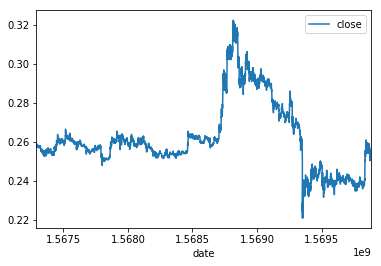

In [72]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-01 00:00:00') & 
                        (XRP_for_testing_drop_na['datetime_real'] <= '2019-10-01 00:00:00')][['close','date']].set_index('date').plot()

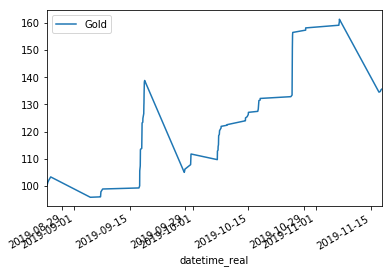

In [73]:
transation_log[(transation_log['action'] != 'brought')][['Gold','datetime_real']].set_index('datetime_real').plot()

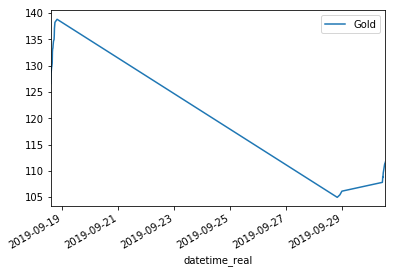

In [74]:
transation_log[(transation_log['datetime_real'] >= '2019-09-18 12:00:00') & 
                (transation_log['datetime_real'] <= '2019-10-01 00:00:00') & 
               (transation_log['action'] != 'brought')][['Gold','datetime_real']].set_index('datetime_real').plot()

## Deeper look

In [100]:
transation_log[(transation_log['datetime_real'] >= '2019-09-17 12:00:00') & 
                                      (transation_log['datetime_real'] <= '2019-09-20 00:00:00')] 

,Gold,XRP_Amount,action,price_action_happened,datetime_real,USD
1568721900,99.983953,0.0000,sell,0.268520,2019-09-17 13:05:00,99.98
1568722200,0.000000,369.5703,brought,0.270000,2019-09-17 13:10:00,0.00
1568722500,102.568889,0.0000,sell,0.272631,2019-09-17 13:15:00,102.57
1568722800,0.000000,375.6468,brought,0.272500,2019-09-17 13:20:00,0.00
1568723400,104.325215,0.0000,sell,0.273477,2019-09-17 13:30:00,104.33
1568723700,0.000000,379.7171,brought,0.274195,2019-09-17 13:35:00,0.00
1568724000,105.539717,0.0000,sell,0.275000,2019-09-17 13:40:00,105.54
1568724300,0.000000,380.2521,brought,0.276997,2019-09-17 13:45:00,0.00
1568731800,106.694742,0.0000,sell,0.274610,2019-09-17 15:50:00,106.69
1568732100,0.000000,381.6803,brought,0.278981,2019-09-17 15:55:00,0.00


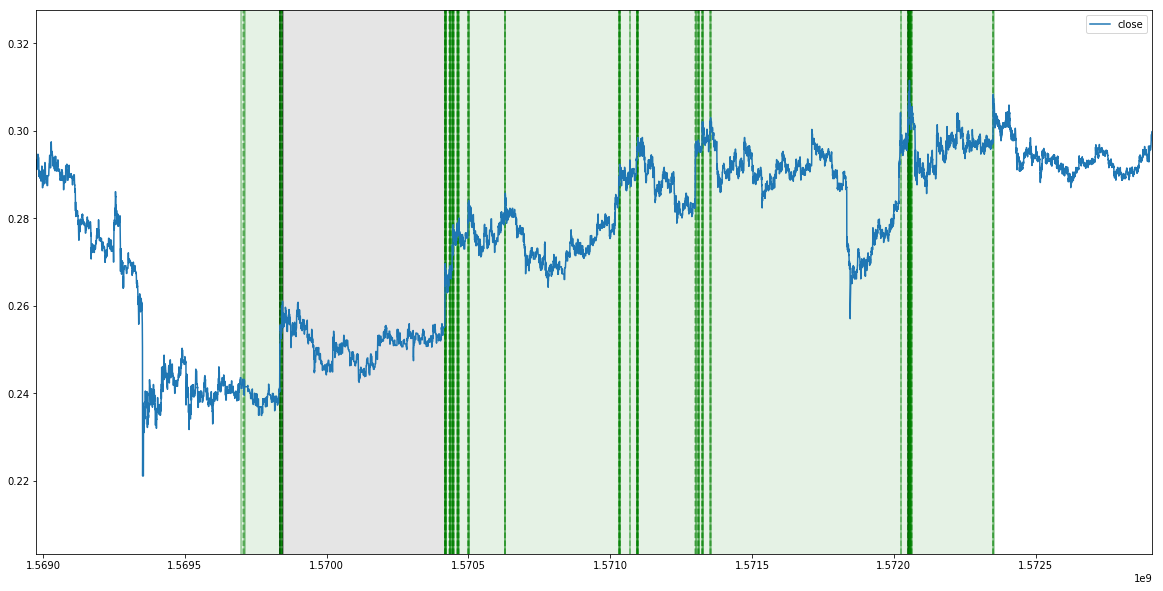

In [133]:
plotting_view(XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-20 12:00:00') & 
                                      (XRP_for_testing_drop_na['datetime_real'] <= '2019-11-05 00:00:00')]
              , transation_log[(transation_log['datetime_real'] >= '2019-09-20 12:00:00') & 
                                      (transation_log['datetime_real'] <= '2019-11-05 00:00:00')] )

#### Catch "step-downs" and "sharp-drops"

In [ ]:
mark:
    
# for_plotting_visual = XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-24 19:00:00') & 
#                                       (XRP_for_testing_drop_na['datetime_real'] <= '2019-09-24 20:00:00')]
                        
    
# for_plotting_visual_2 = XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-10-23 10:00:00') & 
#                                       (XRP_for_testing_drop_na['datetime_real'] <= '2019-10-23 20:00:00')]
                        

In [169]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-24 19:40:00') & 
                                      (XRP_for_testing_drop_na['datetime_real'] <= '2019-09-24 20:05:00')]

,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real,5min_RA_on_Close,...,calculate_look_back_Percent_15min,calculate_look_back_Percent_20min,calculate_look_back_Percent_1H,calculate_look_back_Percent_2H,calculate_look_back_Percent_4H,calculate_look_back_Percent_12H,calculate_look_back_Percent_24H,calculate_look_back_Percent_5D,calculate_look_back_Percent_10D,Buy_from_decision_tree
15493,0.256000,1569350400,0.257000,0.256000,0.257000,59511.077771,15246.540525,0.256197,2019-09-24 19:40:00,0.257000,...,-0.018807,-0.022532,-0.009330,-0.003333,-0.002501,-0.001978,-0.001734,-0.000647,-0.000049,True
15494,0.253000,1569350700,0.256980,0.253000,0.256980,25963.125996,6600.727357,0.254235,2019-09-24 19:45:00,0.256000,...,-0.029044,-0.029105,-0.011667,-0.005825,-0.003568,-0.002394,-0.001943,-0.000716,-0.000070,True
15495,0.250452,1569351000,0.253000,0.250452,0.252779,42831.727317,10773.996195,0.251542,2019-09-24 19:50:00,0.253000,...,-0.043657,-0.034525,-0.017317,-0.007947,-0.004444,-0.002748,-0.002106,-0.000751,-0.000088,True
15496,0.234101,1569351300,0.250980,0.234101,0.250452,138231.007562,33773.406405,0.244326,2019-09-24 19:55:00,0.250452,...,-0.145995,-0.114496,-0.044569,-0.020512,-0.010784,-0.005019,-0.003242,-0.000951,-0.000195,True
15497,0.221105,1569351600,0.234299,0.215123,0.234299,144805.187238,32354.333772,0.223434,2019-09-24 20:00:00,0.234101,...,-0.212634,-0.174476,-0.066229,-0.031263,-0.015938,-0.006824,-0.004144,-0.001131,-0.000291,True
15498,0.227368,1569351900,0.230472,0.214000,0.221105,180660.242058,40286.629873,0.222997,2019-09-24 20:05:00,0.221105,...,-0.153894,-0.128162,-0.055791,-0.026631,-0.012381,-0.005821,-0.003530,-0.001023,-0.000248,True


In [160]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-10-23 13:00:00') & 
                                      (XRP_for_testing_drop_na['datetime_real'] <= '2019-10-23 14:00:00')]

,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real,5min_RA_on_Close,...,calculate_look_back_Percent_15min,calculate_look_back_Percent_20min,calculate_look_back_Percent_1H,calculate_look_back_Percent_2H,calculate_look_back_Percent_4H,calculate_look_back_Percent_12H,calculate_look_back_Percent_24H,calculate_look_back_Percent_5D,calculate_look_back_Percent_10D,Buy_from_decision_tree
23765,0.287008,1571832000,0.287516,0.287008,0.287279,4114.262019,1182.423658,0.287396,2019-10-23 13:00:00,0.287279,...,-0.009316,-0.001353,-0.004563,-0.002577,0.000199,-0.000331,-0.000602,-0.000077,0.000064,True
23766,0.286531,1571832300,0.287471,0.286531,0.287471,403.965084,115.869508,0.286830,2019-10-23 13:05:00,0.287008,...,-0.007399,-0.009374,-0.004252,-0.002975,-0.000074,-0.000354,-0.000540,-0.000084,0.000057,True
23767,0.287215,1571832600,0.287215,0.286020,0.286203,235.395256,67.446166,0.286523,2019-10-23 13:10:00,0.286531,...,-0.000423,-0.002126,-0.003111,-0.002405,0.000000,-0.000330,-0.000541,-0.000074,0.000062,False
23768,0.287215,1571832900,0.287215,0.287215,0.287215,0.000000,0.000000,0.287215,2019-10-23 13:15:00,0.287215,...,0.001381,-0.000317,-0.003111,-0.002532,0.000000,-0.000266,-0.000498,-0.000060,0.000064,False
23769,0.287049,1571833200,0.287049,0.287049,0.287049,472.020112,135.493114,0.287049,2019-10-23 13:20:00,0.287215,...,0.003459,0.000207,-0.003387,-0.003092,-0.000208,-0.000417,-0.000609,-0.000062,0.000059,False
23770,0.287049,1571833500,0.287049,0.287044,0.287044,1011.042024,290.214939,0.287045,2019-10-23 13:25:00,0.287049,...,-0.001105,0.002594,-0.003387,-0.002335,-0.000209,-0.000424,-0.000574,-0.000062,0.000059,False
23771,0.287198,1571833800,0.287198,0.287198,0.287198,3.485054,1.000900,0.287198,2019-10-23 13:30:00,0.287049,...,-0.000116,-0.000087,-0.003990,-0.002124,-0.000244,-0.000344,-0.000599,-0.000060,0.000060,False
23772,0.285659,1571834100,0.286709,0.285659,0.286709,1554.323424,444.091312,0.285714,2019-10-23 13:35:00,0.287198,...,-0.009267,-0.007779,-0.005704,-0.002984,-0.000790,-0.000546,-0.000644,-0.000089,0.000046,True
23773,0.273536,1571834400,0.285600,0.273536,0.285600,245494.471961,68641.005711,0.279603,2019-10-23 13:40:00,0.285659,...,-0.090087,-0.067565,-0.022904,-0.012954,-0.005841,-0.002230,-0.001548,-0.000247,-0.000039,True
23774,0.275306,1571834700,0.275306,0.268762,0.273536,300851.184044,81936.964652,0.272350,2019-10-23 13:45:00,0.273536,...,-0.079278,-0.058717,-0.021832,-0.011702,-0.005104,-0.002055,-0.001425,-0.000223,-0.000027,True


In [151]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-10-23 13:00:00') & 
                                      (XRP_for_testing_drop_na['datetime_real'] <= '2019-10-23 14:00:00')]

,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real,5min_RA_on_Close,...,calculate_look_back_Percent_15min,calculate_look_back_Percent_20min,calculate_look_back_Percent_1H,calculate_look_back_Percent_2H,calculate_look_back_Percent_4H,calculate_look_back_Percent_12H,calculate_look_back_Percent_24H,calculate_look_back_Percent_5D,calculate_look_back_Percent_10D,Buy_from_decision_tree
23765,0.287008,1571832000,0.287516,0.287008,0.287279,4114.262019,1182.423658,0.287396,2019-10-23 13:00:00,0.287279,...,-0.009316,-0.001353,-0.004563,-0.002577,0.000199,-0.000331,-0.000602,-0.000077,0.000064,True
23766,0.286531,1571832300,0.287471,0.286531,0.287471,403.965084,115.869508,0.286830,2019-10-23 13:05:00,0.287008,...,-0.007399,-0.009374,-0.004252,-0.002975,-0.000074,-0.000354,-0.000540,-0.000084,0.000057,True
23767,0.287215,1571832600,0.287215,0.286020,0.286203,235.395256,67.446166,0.286523,2019-10-23 13:10:00,0.286531,...,-0.000423,-0.002126,-0.003111,-0.002405,0.000000,-0.000330,-0.000541,-0.000074,0.000062,False
23768,0.287215,1571832900,0.287215,0.287215,0.287215,0.000000,0.000000,0.287215,2019-10-23 13:15:00,0.287215,...,0.001381,-0.000317,-0.003111,-0.002532,0.000000,-0.000266,-0.000498,-0.000060,0.000064,False
23769,0.287049,1571833200,0.287049,0.287049,0.287049,472.020112,135.493114,0.287049,2019-10-23 13:20:00,0.287215,...,0.003459,0.000207,-0.003387,-0.003092,-0.000208,-0.000417,-0.000609,-0.000062,0.000059,False
23770,0.287049,1571833500,0.287049,0.287044,0.287044,1011.042024,290.214939,0.287045,2019-10-23 13:25:00,0.287049,...,-0.001105,0.002594,-0.003387,-0.002335,-0.000209,-0.000424,-0.000574,-0.000062,0.000059,False
23771,0.287198,1571833800,0.287198,0.287198,0.287198,3.485054,1.000900,0.287198,2019-10-23 13:30:00,0.287049,...,-0.000116,-0.000087,-0.003990,-0.002124,-0.000244,-0.000344,-0.000599,-0.000060,0.000060,False
23772,0.285659,1571834100,0.286709,0.285659,0.286709,1554.323424,444.091312,0.285714,2019-10-23 13:35:00,0.287198,...,-0.009267,-0.007779,-0.005704,-0.002984,-0.000790,-0.000546,-0.000644,-0.000089,0.000046,True
23773,0.273536,1571834400,0.285600,0.273536,0.285600,245494.471961,68641.005711,0.279603,2019-10-23 13:40:00,0.285659,...,-0.090087,-0.067565,-0.022904,-0.012954,-0.005841,-0.002230,-0.001548,-0.000247,-0.000039,True
23774,0.275306,1571834700,0.275306,0.268762,0.273536,300851.184044,81936.964652,0.272350,2019-10-23 13:45:00,0.273536,...,-0.079278,-0.058717,-0.021832,-0.011702,-0.005104,-0.002055,-0.001425,-0.000223,-0.000027,True


In [162]:
(0.287198 - 0.273536)/0.287198

0.04756996915020302

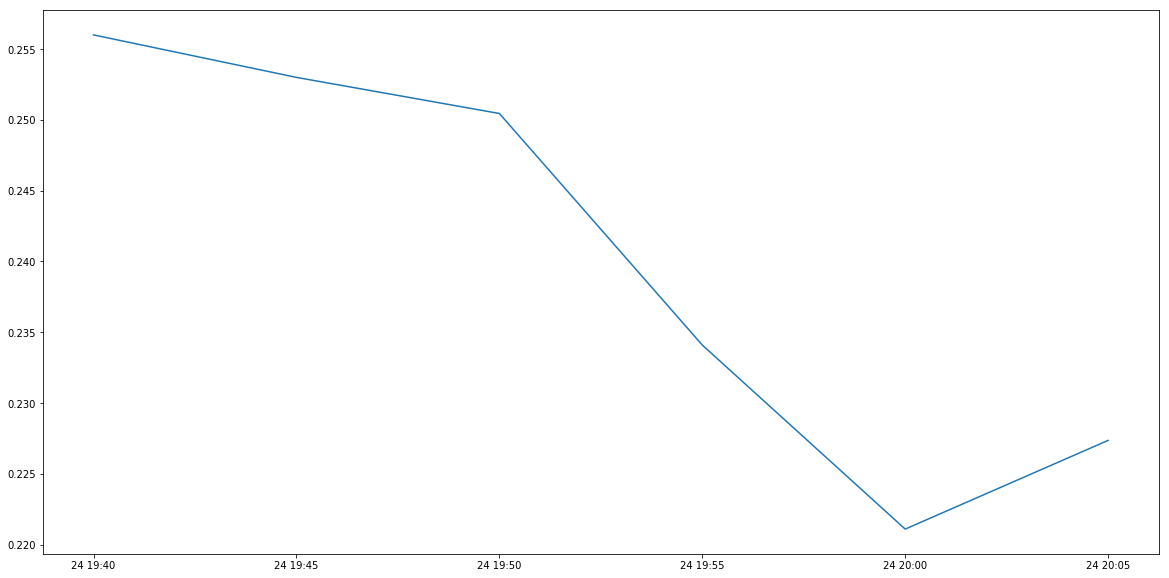

In [168]:
plt.figure(figsize= (20,10))

# for_plotting_visual = XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-24 19:00:00') & 
#                                       (XRP_for_testing_drop_na['datetime_real'] <= '2019-09-24 20:00:00')]
                        
# for_plotting_visual_2 = XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-24 19:00:00') & 
#                                       (XRP_for_testing_drop_na['datetime_real'] <= '2019-09-24 22:00:00')]

for_plotting_visual = XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-24 19:40:00') & 
                                      (XRP_for_testing_drop_na['datetime_real'] <= '2019-09-24 20:05:00')]

tran_x = for_plotting_visual['datetime_real']
# tran_y_close = for_plotting_visual['close']


tran_x_2 = for_plotting_visual['datetime_real']
tran_y_2_close = for_plotting_visual['close']


plt.plot(tran_x_2, tran_y_2_close)
# plt.plot(tran_x, tran_y_close)



#### 

In [115]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-24 19:00:00') & 
                                      (XRP_for_testing_drop_na['datetime_real'] <= '2019-09-24 22:00:00')]


,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real,5min_RA_on_Close,...,calculate_look_back_Percent_15min,calculate_look_back_Percent_20min,calculate_look_back_Percent_1H,calculate_look_back_Percent_2H,calculate_look_back_Percent_4H,calculate_look_back_Percent_12H,calculate_look_back_Percent_24H,calculate_look_back_Percent_5D,calculate_look_back_Percent_10D,Buy_from_decision_tree
15485,0.260842,1569348000,0.260842,0.260842,0.260842,0.000000,0.000000,0.260842,2019-09-24 19:00:00,0.260842,...,0.005614,-0.003779,0.003703,-0.001132,-0.001551,-0.001353,-0.001242,-0.000575,-0.000015,True
15486,0.260842,1569348300,0.260842,0.260842,0.260842,0.000000,0.000000,0.260842,2019-09-24 19:05:00,0.260842,...,0.000000,0.004210,0.002529,-0.001588,-0.001364,-0.001353,-0.001242,-0.000599,-0.000015,True
15487,0.259051,1569348600,0.259726,0.259051,0.259726,3023.394261,783.685554,0.259207,2019-09-24 19:10:00,0.260842,...,-0.011938,-0.008953,0.000212,-0.003080,-0.002062,-0.001602,-0.001366,-0.000624,-0.000028,True
15488,0.260506,1569348900,0.260506,0.260506,0.260506,37.597523,9.794393,0.260506,2019-09-24 19:15:00,0.259051,...,-0.002238,-0.001678,-0.000030,-0.001429,-0.001294,-0.001400,-0.001384,-0.000569,-0.000018,True
15489,0.260506,1569349200,0.260506,0.260506,0.260506,0.000000,0.000000,0.260506,2019-09-24 19:20:00,0.260506,...,-0.002238,-0.001678,0.000659,-0.001429,-0.000622,-0.001352,-0.001384,-0.000570,-0.000018,True
15490,0.258821,1569349500,0.258921,0.258821,0.258921,773.332405,200.193333,0.258871,2019-09-24 19:25:00,0.260506,...,-0.001536,-0.010105,-0.002914,-0.002732,-0.001325,-0.001586,-0.001501,-0.000593,-0.000029,True
15491,0.257357,1569349800,0.258621,0.257186,0.258621,23263.026241,5986.973928,0.257360,2019-09-24 19:30:00,0.258821,...,-0.020999,-0.008474,-0.007272,-0.003450,-0.001229,-0.001789,-0.001632,-0.000658,-0.000040,True
15492,0.257000,1569350100,0.258547,0.257000,0.258547,27620.929720,7101.902011,0.257120,2019-09-24 19:35:00,0.257357,...,-0.023375,-0.017531,-0.005187,-0.002552,-0.001873,-0.001839,-0.001665,-0.000663,-0.000042,True
15493,0.256000,1569350400,0.257000,0.256000,0.257000,59511.077771,15246.540525,0.256197,2019-09-24 19:40:00,0.257000,...,-0.018807,-0.022532,-0.009330,-0.003333,-0.002501,-0.001978,-0.001734,-0.000647,-0.000049,True
15494,0.253000,1569350700,0.256980,0.253000,0.256980,25963.125996,6600.727357,0.254235,2019-09-24 19:45:00,0.256000,...,-0.029044,-0.029105,-0.011667,-0.005825,-0.003568,-0.002394,-0.001943,-0.000716,-0.000070,True


# Draft Paper

### Static trading

In [82]:
time_event = {}
starting_asset = 100
bought_crypto = False


gold_available = starting_asset 
XRP_amount = 0


drop_limit = 0.005 # used mean on this side, actual 0.004686, but decreased abit for optimistic view 

stop_loss_limit = 0.02
sell_limit = 0.005

trading_data = XRP_for_testing_drop_na
while gold_available >= 0:
    
    for ind, df in trading_data.iterrows():
#         print(df['date'])
        
        if bought_crypto != True: # then looking to buy at drop limit or lower
            if (( df['20min_RA_on_Close'] - df['low'] ) / df['20min_RA_on_Close'] >= drop_limit ) and (df['20min_RA_on_Close'] != df['2H_RA_on_Close']): 
                "then buy crypto"

                XRP_amount += (gold_available/df['low']) * 0.998 # due to 0.2% fee

                gold_available -= gold_available
                
                time_event.update({df['date']  : ( gold_available, XRP_amount , 'brought' , df['low'])})
                
                last_xrp_traction_price =  df['low']
                
                bought_crypto = True
                
                latest_bought_crypto_timestamp = df['date']
                
#                 print('last_xrp_traction_price ', last_xrp_traction_price)
                
        else:
            if bought_crypto: # has crypto, either wait or sell at stoploss or profit
#                 print('hit_sell_limit',
#                       (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit ,
#                       round((df['high'] - last_xrp_traction_price),6) ,
#                       'sell_limit ', sell_limit
                     
#                       )

                if df['date'] - latest_bought_crypto_timestamp > 172800:
                    
                    gold_available += XRP_amount * df['high'] * 0.998  # sell at low price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'time_stop' ,  df['low'])})
                    
                    bought_crypto = False
                    
                
                elif ( df['20min_RA_on_Close'] - df['low'] ) / df['20min_RA_on_Close'] >= stop_loss_limit: # then hit stop loss, force sell
#                     print('stoppppppppppppppppppppppppp')
                    gold_available += XRP_amount * df['low'] * 0.998  # sell at low price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'stop_loss_hit' ,  df['low'])})
                    
                    bought_crypto = False
                    
                    
                
                elif  (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit: # then hit target price, sell for profit
                    
#                     print(last_xrp_traction_price)
                                        
                    gold_available += XRP_amount * df['high'] * 0.998  # sell at high price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'sell_profit' , df['high'])})
                    
                    bought_crypto = False

    break
                
else:
    print('Negative asset: bankrupt  ->>>   ',  gold_available)

In [83]:
transation_log = pd.DataFrame.from_dict(time_event, orient='index', columns= ['Gold', 'XRP_Amount', 'action', 'price_action_happened'])

transation_log['datetime_real'] = [datetime.fromtimestamp(d) for d in transation_log.index]

transation_log['Gold'] = round(transation_log['Gold'], 2)

transation_log['XRP_Amount'] = round(transation_log['XRP_Amount'], 4)

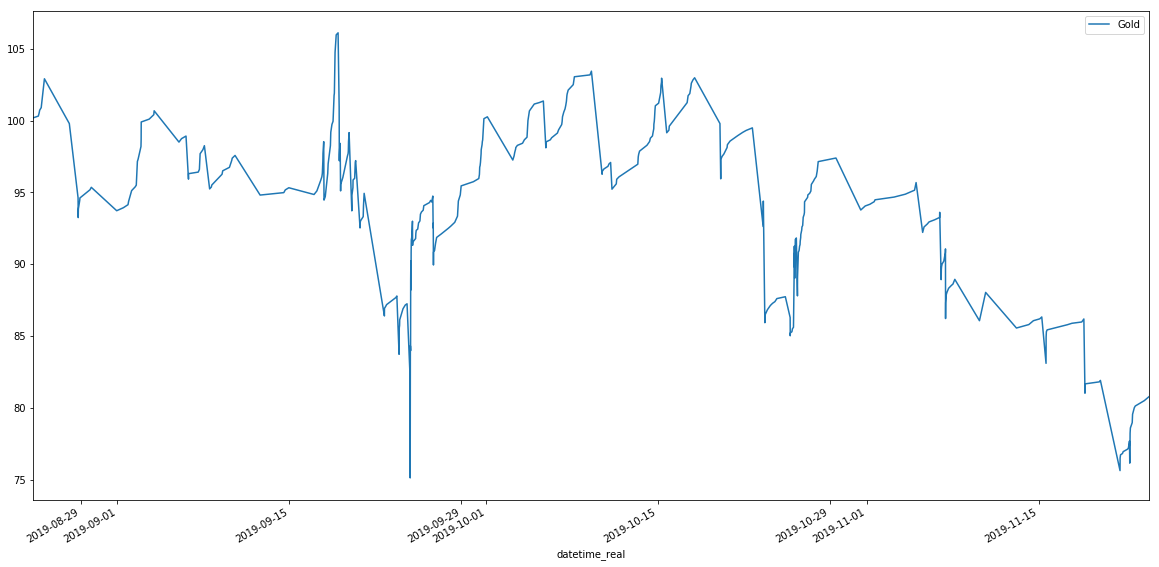

In [84]:
transation_log[transation_log['action'] != 'brought'].set_index('datetime_real')[['Gold']].plot(figsize = (20,10))

In [85]:
transation_log

,Gold,XRP_Amount,action,price_action_happened,datetime_real
1566697800,0.00,371.8453,brought,0.268391,2019-08-25 02:50:00
1566699600,100.20,0.0000,sell_profit,0.269997,2019-08-25 03:20:00
1566734400,0.00,366.2122,brought,0.273055,2019-08-25 13:00:00
1566735600,100.32,0.0000,sell_profit,0.274479,2019-08-25 13:20:00
1566738300,0.00,366.0261,brought,0.273522,2019-08-25 14:05:00
1566741000,100.52,0.0000,sell_profit,0.275180,2019-08-25 14:50:00
1566743100,0.00,373.2854,brought,0.268750,2019-08-25 15:25:00
1566745200,100.73,0.0000,sell_profit,0.270376,2019-08-25 16:00:00
1566749700,0.00,372.2890,brought,0.270017,2019-08-25 17:15:00
1566756000,100.91,0.0000,sell_profit,0.271594,2019-08-25 19:00:00


# identify sharp drop bounce back

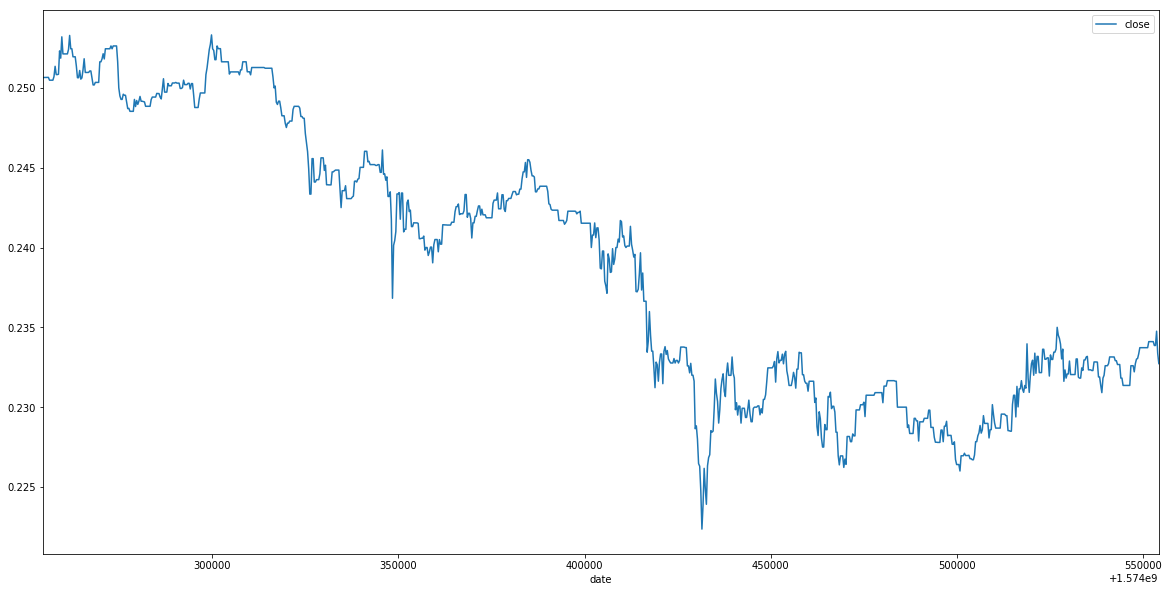

In [80]:
XRP_for_testing_drop_na.tail(1000).set_index('date')[['close']].plot(figsize = (20,10))